In [1]:
# Find the direction of dataset
import numpy as np
import pandas as pd
import os

In [2]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [3]:
#!unzip archive.zip
#import zipfile 
#zf=zipfile.ZipFile("C:/Users/Sandeep/Desktop/project/MIAS/archive.zip")

In [4]:
#import pictures from drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip -uq "/content/drive/My Drive/MIAS/archive.zip" -d "/content/drive/My Drive/MIAS"

In [6]:
path = '/content/drive/My Drive/MIAS/all-mias/'

In [7]:
print("reading dataframe")
info=pd.read_csv("/content/drive/My Drive/MIAS/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [8]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [9]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [10]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [11]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]
#ids

In [12]:
# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [13]:
label = np.array(label)

In [14]:
label.shape

(122,)

In [15]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [16]:
img_name = np.array(img_name)
img_name

array(['/content/drive/My Drive/MIAS/all-mias/mdb001.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb002.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb005.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb010.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb012.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb013.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb015.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb017.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb019.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb021.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb023.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb025.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb028.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb030.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb032.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb058.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb059.pgm

In [17]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


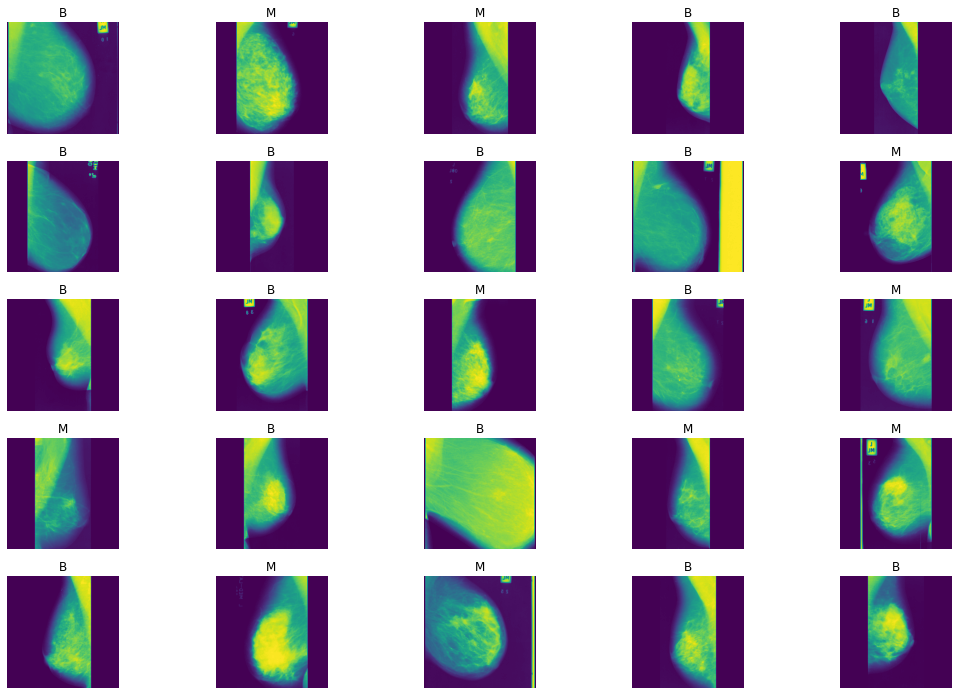

In [18]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')
 
random_images = view_25_random_image()

In [19]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [20]:
last_label = np.array(last_label)
img_path = np.array(img_path)

In [21]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [22]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35136, 8784, 35136, 8784)

In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [24]:
x_train.shape

(35136, 224, 224)

In [25]:
x_test.shape

(8784, 224, 224)

In [26]:
(a,b,c)=x_train.shape # (35136, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

In [27]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [28]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 54, 54, 64)        4

In [29]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
hist = model.fit(x_train,y_train,epochs=10,batch_size=64,callbacks=[early_stop, model_check_point])

Epoch 1/10
549/549 [==============================] - 248s 392ms/step - loss: 0.7815 - accuracy: 0.5661
Epoch 2/10
549/549 [==============================] - 215s 391ms/step - loss: 0.5579 - accuracy: 0.6974
Epoch 3/10
549/549 [==============================] - 215s 391ms/step - loss: 0.4027 - accuracy: 0.8151
Epoch 4/10
549/549 [==============================] - 215s 391ms/step - loss: 0.2576 - accuracy: 0.8930
Epoch 5/10
549/549 [==============================] - 215s 391ms/step - loss: 0.1781 - accuracy: 0.9308
Epoch 6/10
549/549 [==============================] - 215s 391ms/step - loss: 0.1281 - accuracy: 0.9540
Epoch 7/10
549/549 [==============================] - 214s 390ms/step - loss: 0.1144 - accuracy: 0.9607
Epoch 8/10
549/549 [==============================] - 214s 389ms/step - loss: 0.0937 - accuracy: 0.9689
Epoch 9/10
549/549 [==============================] - 214s 389ms/step - loss: 0.0767 - accuracy: 0.9748
Epoch 10/10
549/549 [==============================] - 214s 389m

In [31]:
loss_value , accuracy = model.evaluate(x_test, y_test)
 
print('Test_loss_value = ' +str(loss_value))
acc_CNN=round(accuracy*100,2)
print(acc_CNN)
 
print(model.predict(x_test))

275/275 [==============================] - 22s 73ms/step - loss: 0.0807 - accuracy: 0.9761
Test_loss_value = 0.08071786910295486
97.61
[[9.4361871e-02]
 [3.4004796e-02]
 [8.5481457e-05]
 ...
 [2.7794312e-03]
 [9.7229338e-01]
 [2.0495003e-01]]


In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred.shape

(8784, 1)

In [37]:
y_pred

array([[9.4361871e-02],
       [3.4004796e-02],
       [8.5481457e-05],
       ...,
       [2.7794312e-03],
       [9.7229338e-01],
       [2.0495003e-01]], dtype=float32)

In [38]:
np.argmax(model.predict(x_test), axis=-1)

array([0, 0, 0, ..., 0, 0, 0])